In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 100)

import datetime
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Loading Data

In [2]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7108 non-null   float64       
 6   N_BATHROOM     7104 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

# 2. Dataframe Statistics

In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
pd.DataFrame({"Missing Values (%)":df.isnull().sum() / len(df.index) * 100})

,Missing Values (%)
PRT_ID,0.000000
AREA,0.000000
INT_SQFT,0.000000
DATE_SALE,0.000000
DIST_MAINROAD,0.000000
N_BEDROOM,0.014067
N_BATHROOM,0.070333
N_ROOM,0.000000
SALE_COND,0.000000
PARK_FACIL,0.000000


In [8]:
df.dropna(inplace=True)
df.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7056 non-null   object        
 1   AREA           7056 non-null   object        
 2   INT_SQFT       7056 non-null   int64         
 3   DATE_SALE      7056 non-null   datetime64[ns]
 4   DIST_MAINROAD  7056 non-null   int64         
 5   N_BEDROOM      7056 non-null   int64         
 6   N_BATHROOM     7056 non-null   int64         
 7   N_ROOM         7056 non-null   int64         
 8   SALE_COND      7056 non-null   object        
 9   PARK_FACIL     7056 non-null   object        
 10  DATE_BUILD     7056 non-null   datetime64[ns]
 11  BUILDTYPE      7056 non-null   object        
 12  UTILITY_AVAIL  7056 non-null   object        
 13  STREET         7056 non-null   object        
 14  MZZONE         7056 non-null   object        
 15  QS_ROOMS       7056 n

# 3. Data Visualization

### Categorical Columns

In [10]:
display(df['AREA'].value_counts())
display(df['SALE_COND'].value_counts())
display(df['PARK_FACIL'].value_counts())
display(df['BUILDTYPE'].value_counts())
display(df['UTILITY_AVAIL'].value_counts())
display(df['STREET'].value_counts())
display(df['MZZONE'].value_counts())

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

In [11]:
chrompet = ['Chrompt','Chrmpet','Chormpet']
tnagar = ['TNagar']
anna_nagar = ['Ana Nagar','Ann Nagar']
karapakkam = ['Karapakam']
velachery = ['Velchery']
adyar = ['Adyr']
kk_nagar = ['KKNagar']

adj_land = ['Adj Land']
abnormal = ['Ab Normal']
partial = ['Partiall','PartiaLl']

no = ['Noo']

others = ['Other']
commercial = ['Comercial']

no_sewage = ['NoSeWa','NoSewr ']
all_pub = ['All Pub']

paved = ['Pavd']
no_access = ['NoAccess']

In [12]:
df['AREA'].replace(to_replace=chrompet, value='Chrompet', inplace=True)
df['AREA'].replace(to_replace=tnagar, value='T Nagar', inplace=True)
df['AREA'].replace(to_replace=anna_nagar, value='Anna Nagar', inplace=True)
df['AREA'].replace(to_replace=karapakkam, value='Karapakkam', inplace=True)
df['AREA'].replace(to_replace=velachery, value='Velachery', inplace=True)
df['AREA'].replace(to_replace=adyar, value='Adyar', inplace=True)
df['AREA'].replace(to_replace=kk_nagar, value='KK Nagar', inplace=True)

df['SALE_COND'].replace(to_replace=adj_land, value='AdjLand', inplace=True)
df['SALE_COND'].replace(to_replace=abnormal, value='AbNormal', inplace=True)
df['SALE_COND'].replace(to_replace=partial, value='Partial', inplace=True)

df['PARK_FACIL'].replace(to_replace=no, value='No', inplace=True)

df['BUILDTYPE'].replace(to_replace=others, value='Others', inplace=True)
df['BUILDTYPE'].replace(to_replace=commercial, value='Commercial', inplace=True)

df['UTILITY_AVAIL'].replace(to_replace=no_sewage, value='No-Sewage', inplace=True)
df['UTILITY_AVAIL'].replace(to_replace=all_pub, value='AllPub', inplace=True)

df['STREET'].replace(to_replace=paved, value='Paved', inplace=True)
df['STREET'].replace(to_replace=no_access, value='No Access', inplace=True)

In [13]:
display(df['AREA'].value_counts())
display(df['SALE_COND'].value_counts())
display(df['PARK_FACIL'].value_counts())
display(df['BUILDTYPE'].value_counts())
display(df['UTILITY_AVAIL'].value_counts())
display(df['STREET'].value_counts())
display(df['MZZONE'].value_counts())

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: AREA, dtype: int64

AdjLand        1432
Partial        1417
Normal Sale    1416
AbNormal       1401
Family         1390
Name: SALE_COND, dtype: int64

Yes    3557
No     3499
Name: PARK_FACIL, dtype: int64

House         2433
Others        2312
Commercial    2311
Name: BUILDTYPE, dtype: int64

No-Sewage    3672
AllPub       1875
ELO          1509
Name: UTILITY_AVAIL, dtype: int64

Paved        2554
Gravel       2502
No Access    2000
Name: STREET, dtype: int64

RL    1849
RH    1808
RM    1801
C      547
A      533
I      518
Name: MZZONE, dtype: int64

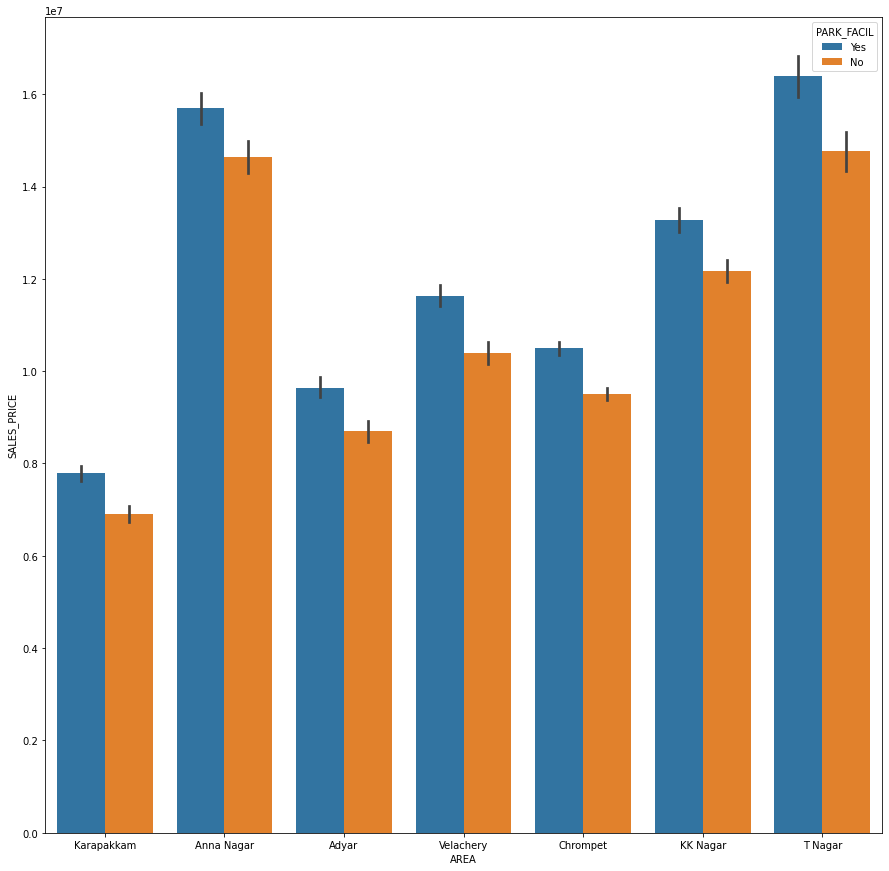

In [14]:
plt.figure(figsize=(15,15))
sns.barplot(x='AREA', y='SALES_PRICE', hue='PARK_FACIL', data=df);

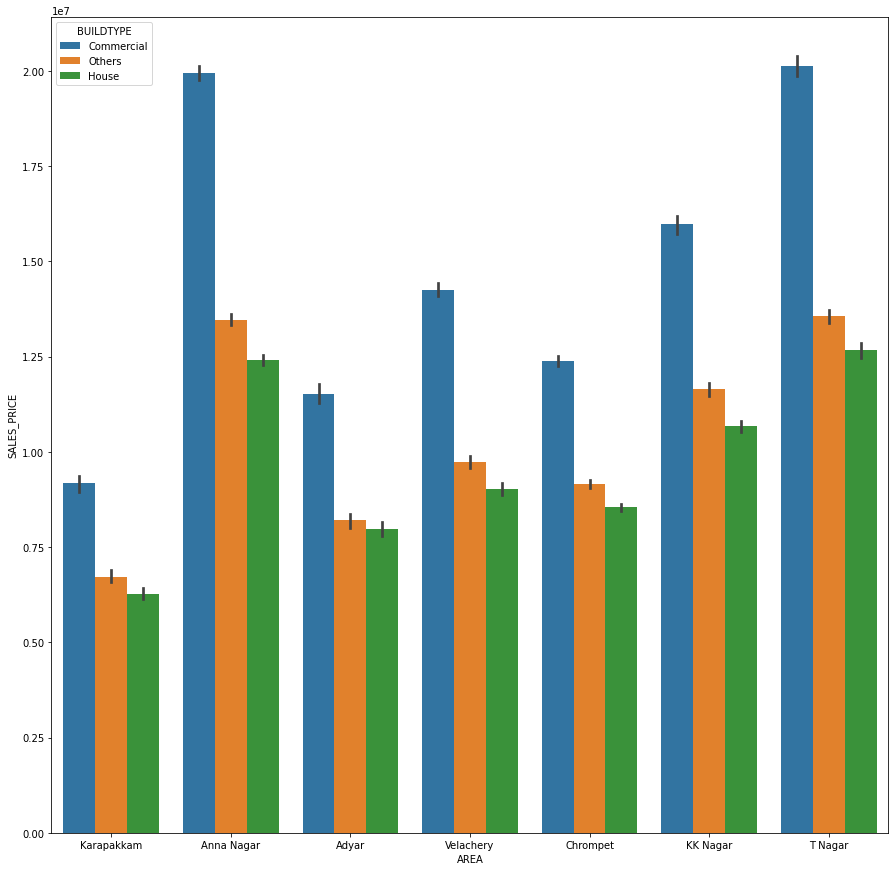

In [15]:
plt.figure(figsize=(15,15))
sns.barplot(x='AREA', y='SALES_PRICE', hue='BUILDTYPE', data=df);

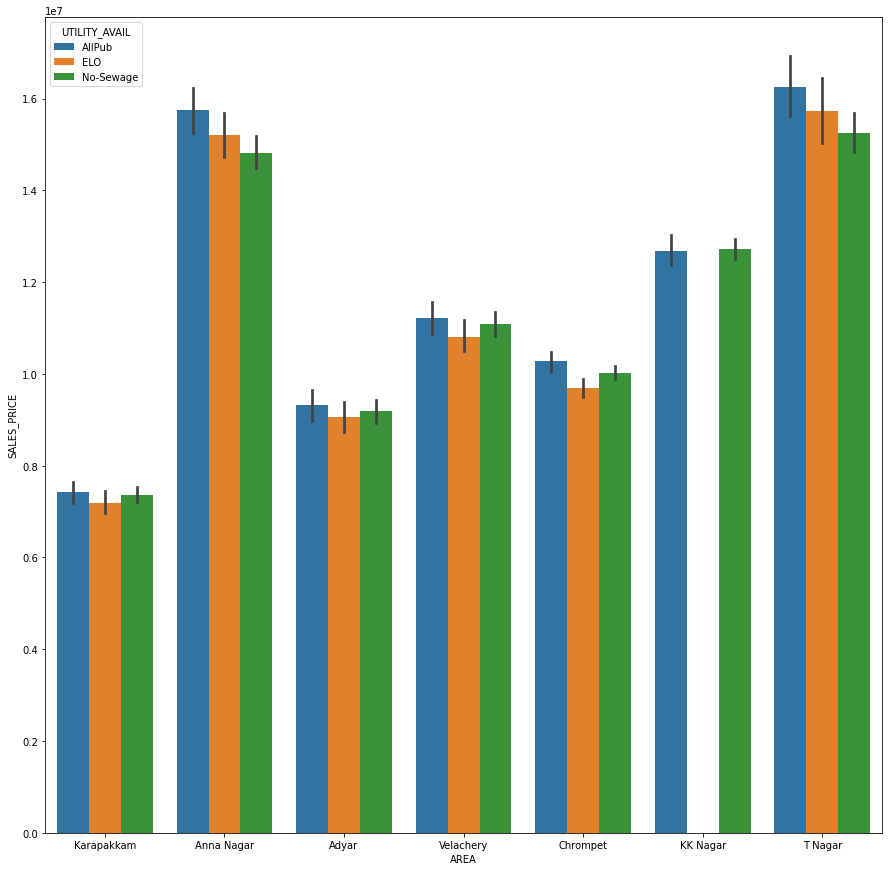

In [16]:
plt.figure(figsize=(15,15))
sns.barplot(x='AREA', y='SALES_PRICE', hue='UTILITY_AVAIL', data=df);

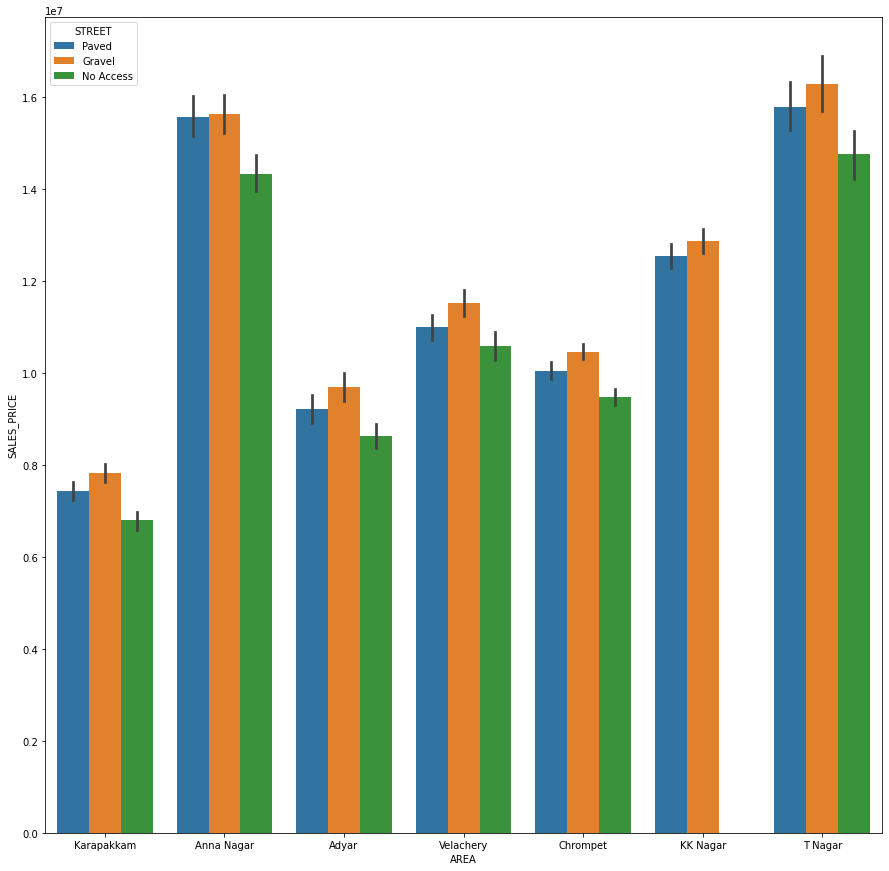

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x='AREA', y='SALES_PRICE', hue='STREET', data=df);

### Numeric Columns

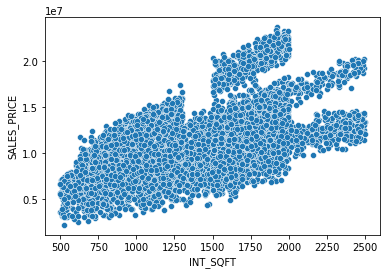

In [18]:
sns.scatterplot(x='INT_SQFT', y='SALES_PRICE', data=df);

In [19]:
num_cols = df.select_dtypes(exclude=['object','datetime64'])
num_cols

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3,2,5,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2,1,4,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1,1,2,4.6,3.8,4.1,4.160,425350,119098,8507000


In [20]:
def plot_box(col, data):
    print('Mean:', data[col].mean())
    print('Median:', data[col].median())
    sns.boxplot(x=col, data=data)
    plt.show()

Mean: 1381.3167517006802
Median: 1369.5


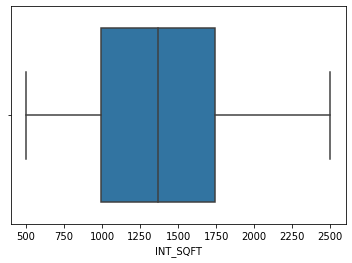

In [21]:
plot_box('INT_SQFT', data=num_cols)

Mean: 99.56916099773242
Median: 99.0


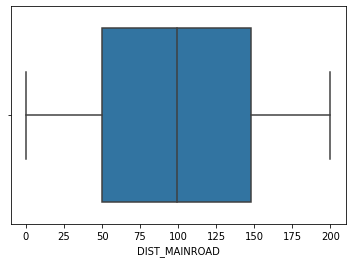

In [22]:
plot_box('DIST_MAINROAD', data=num_cols)

Mean: 376791.85260770976
Median: 349444.5


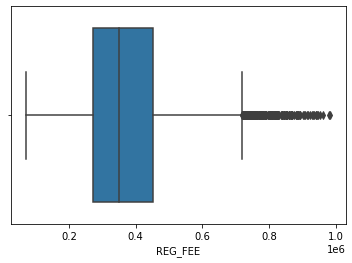

In [23]:
plot_box('REG_FEE', data=num_cols)

Mean: 140994.27338435373
Median: 127640.5


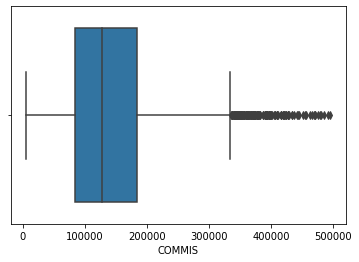

In [24]:
plot_box('COMMIS', data=num_cols)

# Data Preprocessing

### Dates

In [25]:
today = pd.to_datetime('today')
today

Timestamp('2022-03-05 10:38:04.344941')

In [26]:
type(today)

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
df['YEARS_SINCE_BUILT'] = today.year - df['DATE_BUILD'].dt.year
df['YEARS_SINCE_SOLD'] = today.year - df['DATE_SALE'].dt.year

df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEARS_SINCE_BUILT,YEARS_SINCE_SOLD
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,55,11
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,27,16
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,30,10
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,No-Sewage,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,34,12
4,P06210,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,43,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,60,11
7105,P10000,Velachery,1897,2004-04-08,52,3,2,5,Family,Yes,1995-04-11,Others,No-Sewage,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,27,18
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-09-01,House,No-Sewage,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,44,16
7107,P06508,Karapakkam,787,2009-08-03,40,1,1,2,Partial,Yes,1977-08-11,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,45,13


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   PRT_ID             7056 non-null   object        
 1   AREA               7056 non-null   object        
 2   INT_SQFT           7056 non-null   int64         
 3   DATE_SALE          7056 non-null   datetime64[ns]
 4   DIST_MAINROAD      7056 non-null   int64         
 5   N_BEDROOM          7056 non-null   int64         
 6   N_BATHROOM         7056 non-null   int64         
 7   N_ROOM             7056 non-null   int64         
 8   SALE_COND          7056 non-null   object        
 9   PARK_FACIL         7056 non-null   object        
 10  DATE_BUILD         7056 non-null   datetime64[ns]
 11  BUILDTYPE          7056 non-null   object        
 12  UTILITY_AVAIL      7056 non-null   object        
 13  STREET             7056 non-null   object        
 14  MZZONE  

In [29]:
df.drop(columns=['DATE_SALE','DATE_BUILD','PRT_ID','REG_FEE','COMMIS'], inplace=True)
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEARS_SINCE_BUILT,YEARS_SINCE_SOLD
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,55,11
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,27,16
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30,10
3,Velachery,1855,14,3,2,5,Family,No,Others,No-Sewage,Paved,I,4.7,3.9,3.6,4.010,9630290,34,12
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,43,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,60,11
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,No-Sewage,No Access,RH,3.6,4.5,3.3,3.920,10818480,27,18
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,No-Sewage,Gravel,I,4.3,4.2,2.9,3.840,8351410,44,16
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,45,13


### Categorical Columns

In [30]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace(['Yes','No'], [1,0])
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEARS_SINCE_BUILT,YEARS_SINCE_SOLD
0,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,55,11
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,27,16
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30,10
3,Velachery,1855,14,3,2,5,Family,0,Others,No-Sewage,Paved,I,4.7,3.9,3.6,4.010,9630290,34,12
4,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,43,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,60,11
7105,Velachery,1897,52,3,2,5,Family,1,Others,No-Sewage,No Access,RH,3.6,4.5,3.3,3.920,10818480,27,18
7106,Velachery,1614,152,2,1,4,Normal Sale,0,House,No-Sewage,Gravel,I,4.3,4.2,2.9,3.840,8351410,44,16
7107,Karapakkam,787,40,1,1,2,Partial,1,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,45,13


In [31]:
cat_cols = ['AREA','SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']

In [32]:
dummies = pd.get_dummies(df[cat_cols])
dummies.columns

Index(['AREA_Adyar', 'AREA_Anna Nagar', 'AREA_Chrompet', 'AREA_KK Nagar',
       'AREA_Karapakkam', 'AREA_T Nagar', 'AREA_Velachery',
       'SALE_COND_AbNormal', 'SALE_COND_AdjLand', 'SALE_COND_Family',
       'SALE_COND_Normal Sale', 'SALE_COND_Partial', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others', 'UTILITY_AVAIL_AllPub',
       'UTILITY_AVAIL_ELO', 'UTILITY_AVAIL_No-Sewage', 'STREET_Gravel',
       'STREET_No Access', 'STREET_Paved', 'MZZONE_A', 'MZZONE_C', 'MZZONE_I',
       'MZZONE_RH', 'MZZONE_RL', 'MZZONE_RM'],
      dtype='object')

### Numeric Columns

Mean: 10888008.216411564
Median: 10319225.0


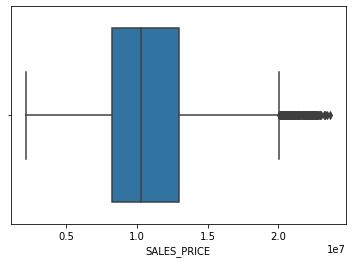

In [33]:
plot_box('SALES_PRICE', data=df)

### Joining Categorical & Numeric into a new dataframe

In [34]:
data = pd.concat([df, dummies], axis=1)
data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEARS_SINCE_BUILT,YEARS_SINCE_SOLD,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_No-Sewage,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,Karapakkam,1004,131,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,55,11,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,Anna Nagar,1986,26,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,27,16,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,Adyar,909,70,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,Velachery,1855,14,3,2,5,Family,0,Others,No-Sewage,Paved,I,4.7,3.9,3.6,4.010,9630290,34,12,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,Karapakkam,1226,84,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,43,13,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,0,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,60,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
7105,Velachery,1897,52,3,2,5,Family,1,Others,No-Sewage,No Access,RH,3.6,4.5,3.3,3.920,10818480,27,18,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
7106,Velachery,1614,152,2,1,4,Normal Sale,0,House,No-Sewage,Gravel,I,4.3,4.2,2.9,3.840,8351410,44,16,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
7107,Karapakkam,787,40,1,1,2,Partial,1,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,45,13,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [35]:
data.drop(columns=['AREA','SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE'], inplace=True)
data

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEARS_SINCE_BUILT,YEARS_SINCE_SOLD,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_AdjLand,SALE_COND_Family,SALE_COND_Normal Sale,SALE_COND_Partial,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_AllPub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_No-Sewage,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1,3,1,4.0,3.9,4.9,4.330,7600000,55,11,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,1986,26,2,1,5,0,4.9,4.2,2.5,3.765,21717770,27,16,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,909,70,1,1,3,1,4.1,3.8,2.2,3.090,13159200,30,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,1855,14,3,2,5,0,4.7,3.9,3.6,4.010,9630290,34,12,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,1226,84,1,1,3,1,3.0,2.5,4.1,3.290,7406250,43,13,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,0,3.0,2.2,2.4,2.520,5353000,60,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3,2,5,1,3.6,4.5,3.3,3.920,10818480,27,18,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
7106,1614,152,2,1,4,0,4.3,4.2,2.9,3.840,8351410,44,16,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
7107,787,40,1,1,2,1,4.6,3.8,4.1,4.160,8507000,45,13,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0


# Modelling

In [36]:
X = data.drop(labels=['SALES_PRICE'], axis=1)
y = data['SALES_PRICE']

print("Shape of Independent Variables:", X.shape)
print("Shape of Dependent Variable:", y.shape)

Shape of Independent Variables: (7056, 39)
Shape of Dependent Variable: (7056,)


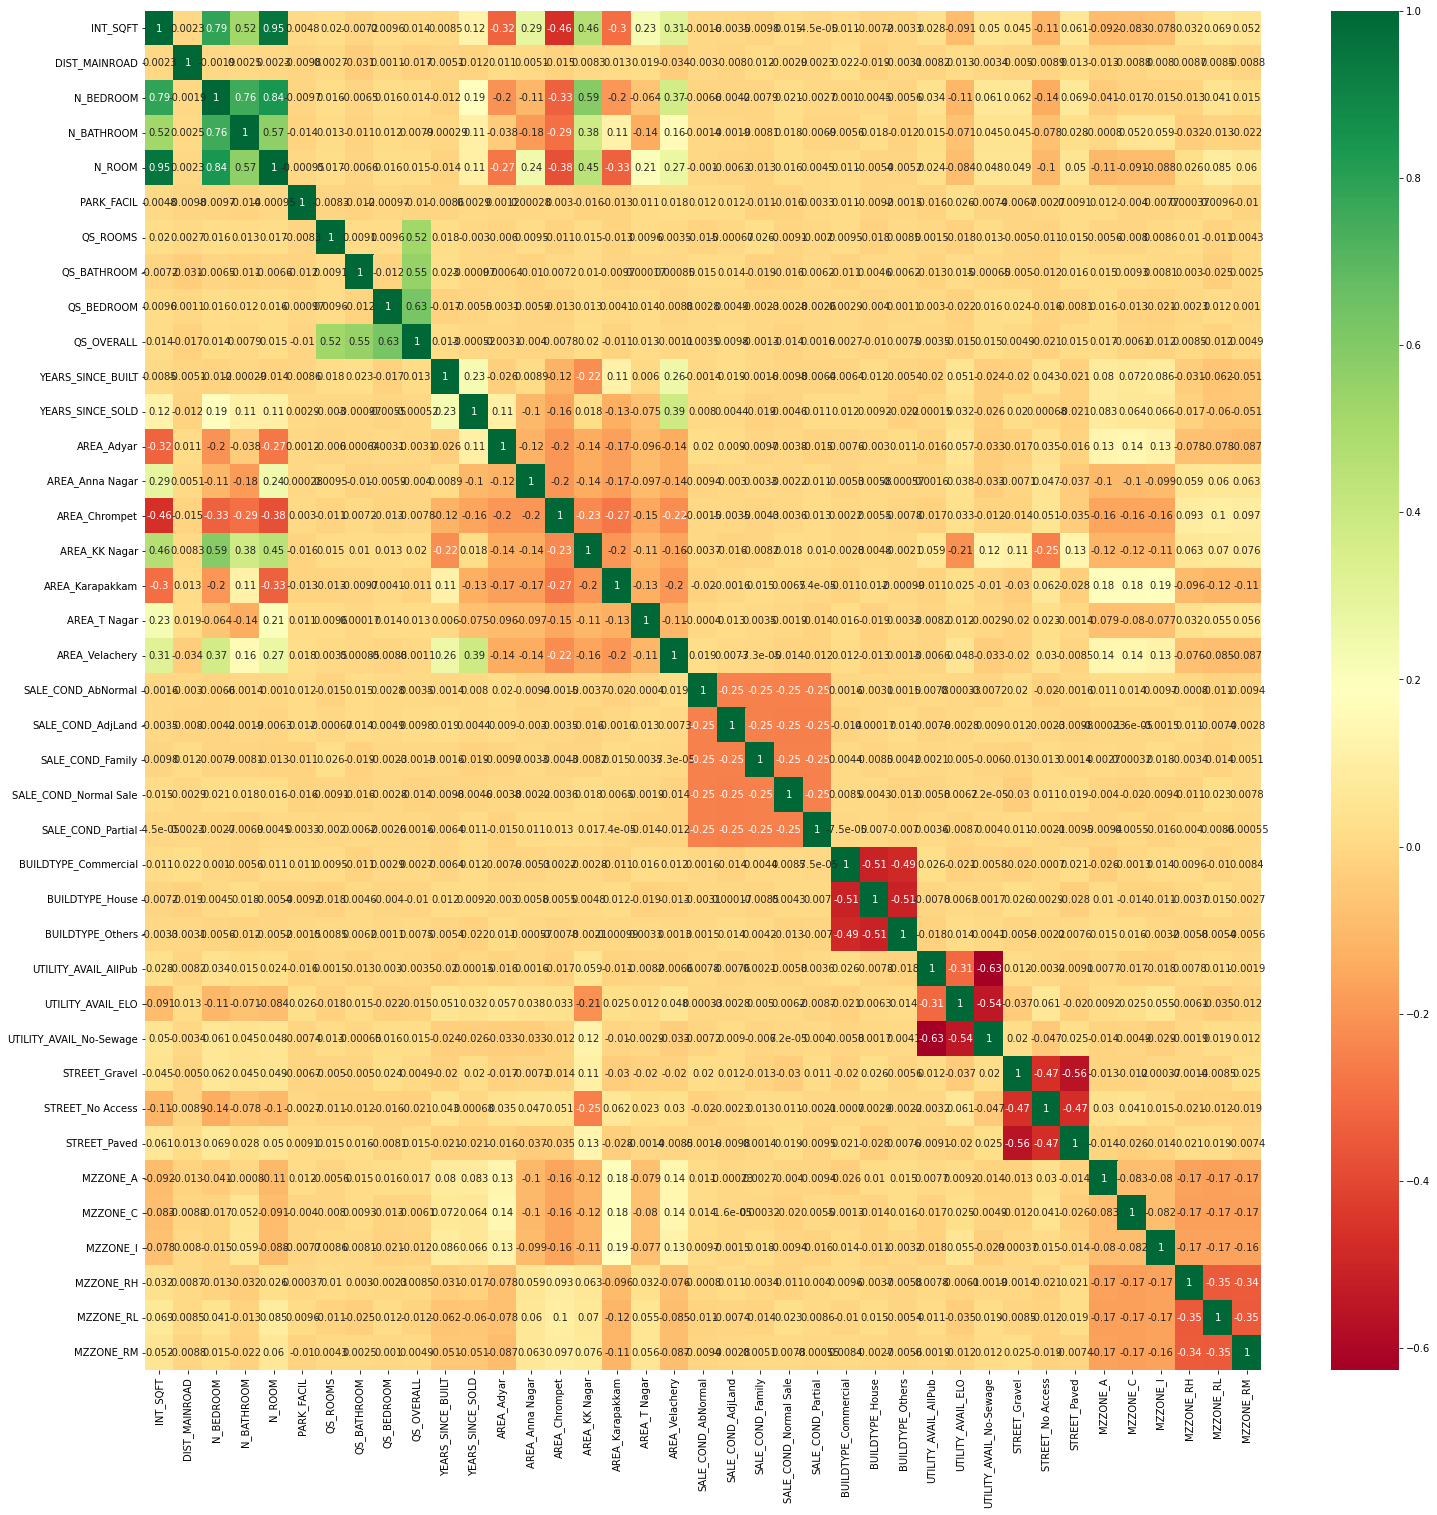

In [37]:
plt.figure(figsize=(25,25))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn');

### Feature Selection using ExtraTreesRegressor

In [38]:
etr = ExtraTreesRegressor()
etr.fit(X, y)

ExtraTreesRegressor()

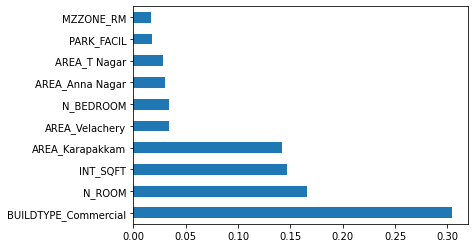

In [39]:
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5292, 39)
(5292,)
(1764, 39)
(1764,)


### Scaling the Train Data

In [41]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. Decision Tree

In [42]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred = dt_reg.predict(X_test)

In [44]:
print('Train score:', dt_reg.score(X_train, y_train))
print('Test score:', dt_reg.score(X_test, y_test))

Train score: 1.0
Test score: 0.9545126934164365


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


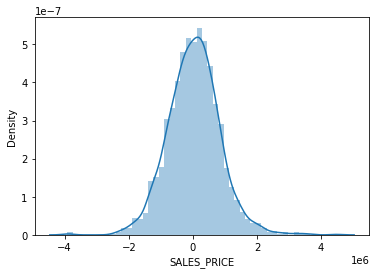

In [45]:
sns.distplot(y_test - y_pred);

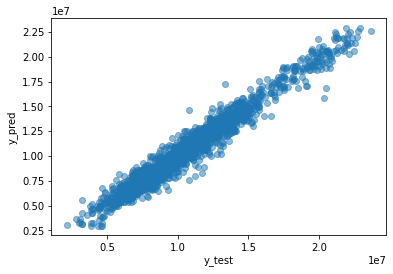

In [46]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [47]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

MAE: 622442.264739229
MSE: 657341149497.69
RMSE: 810765.7796785025
R-squared: 0.9545126934164365


#### 1.1 Hyperparameter Tuning for Decision Tree

In [48]:
param_grid = {"splitter":["best","random"],
              "max_depth" :[int(x) for x in np.linspace(5, 30, num=6)],
              "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
              "min_samples_split":[2,5,10,15],
              "max_features":["auto","log2","sqrt",None]}

In [49]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
dt_reg_grid = GridSearchCV(dt_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=kfold)

# Fitting the grid search
grid_result = dt_reg_grid.fit(X_train, y_train)

# Get results of best score & best params
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

# Get all results of grid search
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, std, param in zip(means, stds, params):
 #   print('%f (%f) with: %r' % (mean, std, param))

Best: -423863478472.305054 using {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


#### 1.2 Predicting with Tuned Decision Tree

In [50]:
y_pred = grid_result.predict(X_test)

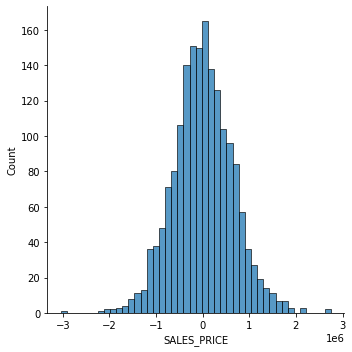

In [51]:
sns.displot(y_test - y_pred);

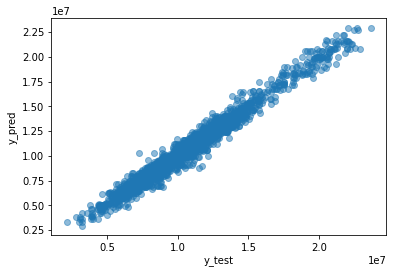

In [52]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [53]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

MAE: 497858.2686314244
MSE: 412724155054.75336
RMSE: 642436.1097064465
R-squared: 0.9714399285823445


### 2. Random Forest

In [54]:
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = rf_reg.predict(X_test)

In [56]:
print('Train score:', rf_reg.score(X_train, y_train))
print('Test score:', rf_reg.score(X_test, y_test))

Train score: 0.9973963256987921
Test score: 0.9798689386245825


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


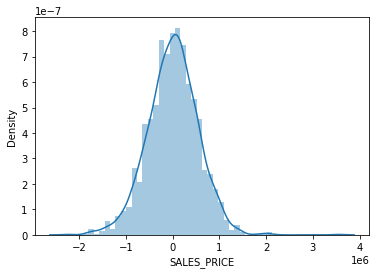

In [57]:
sns.distplot(y_test - y_pred);

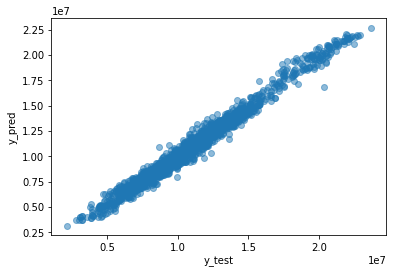

In [58]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [59]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

MAE: 417327.23217120185
MSE: 290915774509.87445
RMSE: 539366.0857987591
R-squared: 0.9798689386245825


### Gradient Boosting (Additional, to create prediction intervals (lower, mid & upper))

In [69]:
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95

# Setting default estimator values
N_ESTIMATORS = 100
MAX_DEPTH = 3

# Each model has to be separate
# Creating lower alpha model
lower_model = GradientBoostingRegressor(loss="quantile", alpha=LOWER_ALPHA,
                                        n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
                                        
# The mid model will use the default
mid_model = GradientBoostingRegressor(loss="squared_error", n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)

# Creating upper alpha model
upper_model = GradientBoostingRegressor(loss="quantile", alpha=UPPER_ALPHA,
                                        n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)

In [71]:
preds = pd.DataFrame(y_test)

_ = lower_model.fit(X_train, y_train)
_ = mid_model.fit(X_train, y_train)
_ = upper_model.fit(X_train, y_train)

preds['lower'] = lower_model.predict(X_test)
preds['mid'] = mid_model.predict(X_test)
preds['upper'] = upper_model.predict(X_test)

preds.head()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


,SALES_PRICE,lower,mid,upper
1869,15559710,1.240243e+07,1.533116e+07,1.671506e+07
5605,10753720,1.025956e+07,1.066230e+07,1.167121e+07
6844,13382350,1.054237e+07,1.378226e+07,1.385719e+07
998,8164875,7.103045e+06,7.620513e+06,9.155359e+06
6861,7131000,6.213744e+06,6.769293e+06,8.388196e+06
